In [1]:
!pip install seaborn

     |████████████████████████████████| 215 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 30.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import json
import pandas as pd

In [13]:
gpu_times_files = [
    ('four_gpu','../../timing_info/vgg/four_gpu/four_gpu_cifar10.json'),
    ('three_gpu','../../timing_info/vgg/three_gpu/three_gpu_cifar10.json'),
    ('two_gpu','../../timing_info/vgg/two_gpu/two_gpu_cifar10.json'),
    ('one_gpu','../../timing_info/vgg/one_gpu/cifar10.json')
]

In [14]:
gpu_times = []

for file in gpu_times_files:
    with open(file[1], 'r') as f:
        gpu_times.append((file[0], json.load(f)))

In [15]:
data_frame_dict = {'run': [], 'layer': [], 'runtime': [], 'rank': [], 'total_time': []}

for run in gpu_times:
    total_time = run[1][-1]
    for layer in run[1][:-1:]:
        data_frame_dict['run'].append(run[0])
        data_frame_dict['layer'].append(layer['layer'])
        data_frame_dict['runtime'].append(layer['run_time'])
        data_frame_dict['rank'].append(layer['rank'])
        data_frame_dict['total_time'].append(total_time['total_time'])

In [16]:
df = pd.DataFrame(data=data_frame_dict)

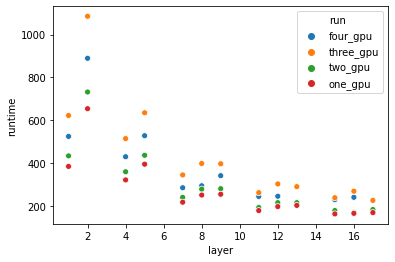

In [17]:
sb.scatterplot(x="layer", y="runtime", hue="run", data=df)